# Создание признаков

## Проектирование признаков

In [1]:
import pandas as pd
df = pd.read_csv('data/wine_cleared.csv') # Загрузка данных из файла в переменную, создание объекта DataFrame
#df.info()

In [2]:
df['price'][129968]

30.0

Разбор числовых величин

In [3]:
df['price_round'] = df['price'].round().astype(int) # создание нового признака с ценой округленной до целого (int)
#df.info()
#df.head()

Разбор текста. Регулярные выражения.

In [4]:
regex = '\d{4}' # класс символов - числа от 0 до 9
df['year'] = df['title'].str.findall(regex).str.get(0) # извлечение "года производства" из описания и запись в отдельный признак
df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
 12  price_round            129971 non-null  int32  
 13  year                   125362 non-null  object 
dtypes: float64(1), int32(1), int64(1), o

Разбор категорий. Кодирование признаков.

In [5]:
# создаем новый признак, если страна производитель US, то ставится единица, если другая, ставится ноль
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)
#df.info()
#df.head()

Задание 2.1
<br>
Выберите из списка две самых популярных (помимо США) страны, производящих вино.

In [6]:
df_count = df['country'].value_counts()
display(df_count)

US                        54567
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Задание 2.2
<br>Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.
<br>В ответ впишите результат выполнения кода data['is_france'].sum():
<br>В ответ впишите результат выполнения кода data['is_italy'].sum():

In [7]:
# создаем новый признак, если страна производитель France, то ставится единица, если другая, ставится ноль
df['is_france'] = df['country'].apply(lambda x: 1 if x=='France' else 0).astype(int)
df_fr_sum = df['is_france'].sum() # сумма по столбцу is_france

# создаем новый признак, если страна производитель Italy, то ставится единица, если другая, ставится ноль
df['is_italy'] = df['country'].apply(lambda x: 1 if x=='Italy' else 0).astype(int)
df_it_sum = df['is_italy'].sum() # сумма по столбцу is_italy

display(f'Франция {df_fr_sum}, Италия {df_it_sum}')

'Франция 22093, Италия 19540'

Задание 2.3
<br>
Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.
<br>В ответ впишите результат выполнения кода data['old_wine'].sum():

In [8]:
# преобразуем признак год из объекта в дату
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# создаем новый бинарный признак "old_wine", где вина старше 2010 года будут обозначены единицей
df['old_wine'] = df['year'].apply(lambda x: 1 if x.year < 2010 else 0)
df['old_wine'].sum()

39765

Задание 2.7 (Самопроверка)
<br>Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
<br>
Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley.<br> В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

In [9]:

regex = '\(([^)]+)\)' # регулярные выражения - поиск слов в круглых скобках
df['locality'] = df['title'].str.findall(regex).str.get(0) # извлечение "наименования местности" из описания и запись в отдельный признак
#df.info()
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley


### Проектирование признаков. Внешние источники данных

In [10]:
# Импорт Pandas
import pandas as pd

# Загружаем дополнительную таблицу country_population
country_population = pd.read_csv('data\country_population.csv', sep=';')
#country_population.info()
country_population.head(25)

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
5,Brazil,"214,191,924"
6,Nigeria,"211,401,000"
7,Bangladesh,"172,011,942"
8,Russia,"146,171,015"
9,Mexico,"126,014,024"


Задание 3.1
<br>
Каково население Италии согласно дата-сету country_population?

In [11]:
country_population.loc[country_population['country']=='Italy']
#country_population.iloc[24, 1]
#df_heart.iloc[300]['trestbps_mean']

,country,population
24,Italy,"59,097,904"


Объединяем таблицы df и country_population по country

In [12]:
df = df.join(country_population.set_index('country'), on=('country'))
#df.head(2)

Добавляем датасет со значением площадей стран

In [13]:
# Загружаем дополнительную таблицу country_area
country_area = pd.read_csv('data\country_area.csv', sep=';')
country_area.info()
#country_area.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  193 non-null    object 
 1   area     193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


Задание 3.2
<br>Создайте новый признак area_country — площадь страны, аналогичный признаку country_population.
<br>Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'?

In [14]:
df = df.join(country_area.set_index('country'), on=('country'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129972 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129972 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129972 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int3

In [15]:
mask = df.loc[df['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']
mask['area']

94    9372610.0
Name: area, dtype: float64

### Создание признаков. Работа с форматом «дата-время»

In [16]:
# Создаём тестовый датасет
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns=['client_id', 'agent_date', 'created_at', 'end_date'])

# преобразовываем признаки в формат datetime для удобной работы
calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

# Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 
# Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка через аксессор dt.seconds
calls['duration_sec'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration_sec
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Задание 4.1
<br>
Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.
<br>
В ответ запишите результат выполнения следующего кода: <i>calls['time_connection'].sum()</i>

In [17]:
# Создаем новый признак 'time_connection'
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

In [18]:
calls

,client_id,agent_date,created_at,end_date,duration_sec,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


Задание 4.2
<br>
Создайте новый признак is_connection — факт соединения с клиентом.<br>Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.
<br>
В ответ запишите результат выполнения следующего кода: <i>calls['is_connection'].sum()</i>

In [19]:
calls['is_connection'] = calls['duration_sec'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

In [20]:
calls

,client_id,agent_date,created_at,end_date,duration_sec,time_connection,is_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0


Задание 4.3
<br>
Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.
<br>
В ответ запишите результат выполнения следующего кода: <i>calls['time_diff'].sum()</i>

In [21]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls
calls['time_diff'].sum()

1144

Итак, мы получили четыре новых признака для нашего набора данных: <b><i>duration, time_connection, is_connection, time_diff</i></b>. После генерации признаков из дат исходные признаки <b>agent_date, created_at, end_date</b> нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [22]:
calls = calls.drop(columns=['agent_date', 'created_at', 'end_date'], axis=1)
calls

,client_id,duration_sec,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


Задание 4.5
<br>
Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года.<br>В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [23]:
df['years_diff'] = (pd.to_datetime('2022-01-12') - df['year']).dt.days
df['years_diff'].max()

98627.0

### Кодирование признаков. Методы

ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

In [24]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [25]:
# импорт необходимой библиотеки
import category_encoders as ce

# вызываем класс для порядкового кодирования
ord_encoder = ce.OrdinalEncoder()

# вызываем метод для установки соответствия кодирования (размер - вещь) и преобразования данных fit_transform
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])

# вызываем метод из Pandas - concat для добавления закодированных признаков в датафрейм
clothing = pd.concat([clothing, data_bin], axis=1)
clothing


,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


Задание 5.3 (Самопроверка)
<br>
Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

In [26]:
# импорт необходимой библиотеки
import category_encoders as ce

# вызываем класс для порядкового кодирования
ord_encoder = ce.OrdinalEncoder(cols=['year'])

# вызываем метод для установки соответствия кодирования (year) и преобразования данных fit_transform
data_bin = ord_encoder.fit_transform(df[['year']])

# чтобы в датасете не было двух столбцов с одинаковым именем присваиваем другое имя 'year_encoder'
data_bin.rename(columns={'year': 'year_encoder'}, inplace=True)

# вызываем метод из Pandas - concat для добавления закодированных признаков в датафрейм
df_1 = pd.concat([df, data_bin], axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129972 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129972 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129972 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int3

In [27]:
type(data_bin)

pandas.core.frame.DataFrame

In [30]:
df_1.columns.values[-1]='XX'

In [31]:
df_1['XX'].unique()

KeyError: 'XX'

### ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

In [32]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [33]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_1,type_2,type_3,type_4
0,xxs,dress,1,0,0,0
1,xxs,skirt,0,1,0,0
2,xs,dress,1,0,0,0
3,s,skirt,0,1,0,0
4,m,dress,1,0,0,0
5,l,shirt,0,0,1,0
6,s,coat,0,0,0,1
7,m,coat,0,0,0,1
8,xxl,shirt,0,0,1,0
9,l,dress,1,0,0,0


In [34]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,type_1,type_2,type_3,type_4,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,0,0,0,0,1,0,0
1,xxs,0,1,0,0,0,0,0,1
2,xs,1,0,0,0,0,1,0,0
3,s,0,1,0,0,0,0,0,1
4,m,1,0,0,0,0,1,0,0
5,l,0,0,1,0,0,0,1,0
6,s,0,0,0,1,1,0,0,0
7,m,0,0,0,1,1,0,0,0
8,xxl,0,0,1,0,0,0,1,0
9,l,1,0,0,0,0,1,0,0


Задание 5.4
<br>
В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.
<br>В ответе напишите, сколько признаков добавилось после применения кодирования.

In [35]:
df_one = pd.get_dummies(df, columns=['taster_name'])
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   country                         129972 non-null  object        
 1   description                     129972 non-null  object        
 2   designation                     129972 non-null  object        
 3   points                          129972 non-null  int64         
 4   price                           129972 non-null  float64       
 5   province                        129972 non-null  object        
 6   region_1                        129972 non-null  object        
 7   taster_twitter_handle           129972 non-null  object        
 8   title                           129972 non-null  object        
 9   variety                         129972 non-null  object        
 10  winery                          129972 non-null  object 

In [36]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(df['taster_name'])
data = pd.concat([df, type_bin], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129972 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129972 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129972 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int3

### ДВОИЧНОЕ КОДИРОВАНИЕ Binary Encoder

In [37]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [38]:
# импорт необходимой библиотеки
import category_encoders as ce

# вызываем класс для порядкового кодирования
bin_encoder = ce.BinaryEncoder(cols=['type'])

# вызываем метод для установки соответствия кодирования (тип - вещь) и преобразования данных fit_transform
type_bin = bin_encoder.fit_transform(clothing['type'])

# вызываем метод из Pandas - concat для добавления закодированных признаков в датафрейм
clothing = pd.concat([clothing, type_bin], axis=1)
clothing


,size,type,type_0,type_1,type_2
0,xxs,dress,0,0,1
1,xxs,skirt,0,1,0
2,xs,dress,0,0,1
3,s,skirt,0,1,0
4,m,dress,0,0,1
5,l,shirt,0,1,1
6,s,coat,1,0,0
7,m,coat,1,0,0
8,xxl,shirt,0,1,1
9,l,dress,0,0,1


Задание 5.5
<br>
Закодируйте признак country двоичным способом.
<br>Сколько новых признаков образовалось после кодирования признака country?

In [39]:
import pandas as pd
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(cols=['country'])
country_bin = bin_encoder.fit_transform(df['country'])
df_bin = pd.concat([df, country_bin], axis=1)

df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129972 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129972 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129972 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int3

Задание 5.8
<br>На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.
<br>В ответе напишите, сколько признаков добавилось после применения кодирования.

In [40]:
df['taster_twitter_handle'].nunique()

16

In [41]:
#df['taster_twitter_handle'].unique()
# Более 15 уникальных значений - используем бинарное кодирование
# импорт необходимой библиотеки
import category_encoders as ce

# вызываем класс для порядкового кодирования
df_bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])

# вызываем метод для установки соответствия кодирования и преобразования данных fit_transform
df_type_bin = df_bin_encoder.fit_transform(df['taster_twitter_handle'])

# вызываем метод из Pandas - concat для добавления закодированных признаков в датафрейм
df_bin_enc = pd.concat([df, df_type_bin], axis=1)
df_bin_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   country                  129972 non-null  object        
 1   description              129972 non-null  object        
 2   designation              129972 non-null  object        
 3   points                   129972 non-null  int64         
 4   price                    129972 non-null  float64       
 5   province                 129972 non-null  object        
 6   region_1                 129972 non-null  object        
 7   taster_name              129972 non-null  object        
 8   taster_twitter_handle    129972 non-null  object        
 9   title                    129972 non-null  object        
 10  variety                  129972 non-null  object        
 11  winery                   129972 non-null  object        
 12  price_round     

Задание 5.9 (Самопроверка)
<br>Используйте следующий датафрейм для задания:

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129972 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129972 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129972 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int3

In [43]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df_59 = pd.DataFrame(list_of_dicts)
df_59

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [44]:
# Однократное кодирование
import category_encoders as ce # импорт для работы с кодировщиком

encoder_59 = ce.OneHotEncoder(['product', 'payment_type']) # указываем столбец для кодирования
type_one_59 = encoder_59.fit_transform(df_59[['product', 'payment_type']])
df_59 = pd.concat([df_59, type_one_59], axis=1)

df_59

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


In [45]:
df_59

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129972 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129972 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129972 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int3

Задание 7.4 (Самопроверка)
<br>
Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.
<br>
❗️ Удалять признак рейтинг — points нельзя!
<br>
❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

<AxesSubplot:>

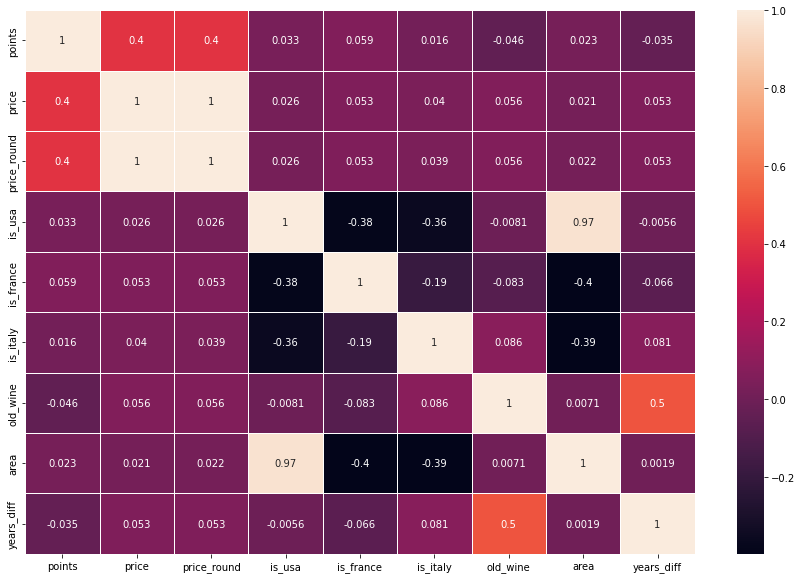

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df_wine = pd.read_csv('data/wine_cleared.csv') # Загрузка данных из файла в переменную, создание объекта DataFrame
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)



In [ ]:
# Удалим самые сильно скоррелированные пары
df_drop = df.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_drop.corr(), annot=True, linewidths=.5, ax=ax)

## Проверка знаний

In [50]:
import pandas as pd

df_heart = pd.read_csv('data/heart.csv', sep=',')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Задание 8.1
<br>
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
<br>
В ответ введите результат выполнения кода heart['old'].sum().

In [51]:
df_heart['old'] = df_heart['age'].apply(lambda x: 1 if x > 60 else 0)

df_heart['old'].sum()

79

Задание 8.2
<br>
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. <br>trestbps — систолическое артериальное давление в состоянии покоя.

In [52]:
def get_trestbps_mean(sex, age):
    pressure = [
        [116, 120, 127, 137, 144, 159],
        [123, 126, 129, 135, 142, 142]
    ]

    if age < 21:
        return pressure[int(sex)][0]
    elif age >= 61:
        return pressure[int(sex)][5]
    else:
        return pressure[int(sex)][int((age - 1) // 10 - 1)]


df_heart['trestbps_mean'] = df_heart.apply(lambda row: get_trestbps_mean(row['sex'], row['age']), axis=1)
#df_heart
df_heart['trestbps_mean'].iloc[300]

142

In [53]:
df_heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0,142
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,0,144
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,0,135
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0,142
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,0,142


In [54]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [55]:
df_heart['exang'].nunique()

2

In [56]:
df_heart.iloc[300]['trestbps_mean']

142.0

Задание 8.5
<br>
Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.
<br> Сколько получилось признаков?

In [57]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder_heart = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) # указываем столбец для кодирования
type_bin_heart = encoder_heart.fit_transform(df_heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
df_heart = pd.concat([df_heart, type_bin_heart], axis=1)

In [58]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

Задание 8.6
<br>
Нормализуйте все числовые признаки подходящим способом.
<br>
В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [59]:
#Подключение библиотек
import pandas as pd

# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df_heart.columns)

# копируем исходный датасет
df_heart_r = r_scaler.fit_transform(df_heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_heart_r = pd.DataFrame(df_heart_r, columns=col_names)

In [60]:
round(df_heart_r['chol'].describe(), 6)

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

Задание 8.7
<br>
Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<AxesSubplot:>

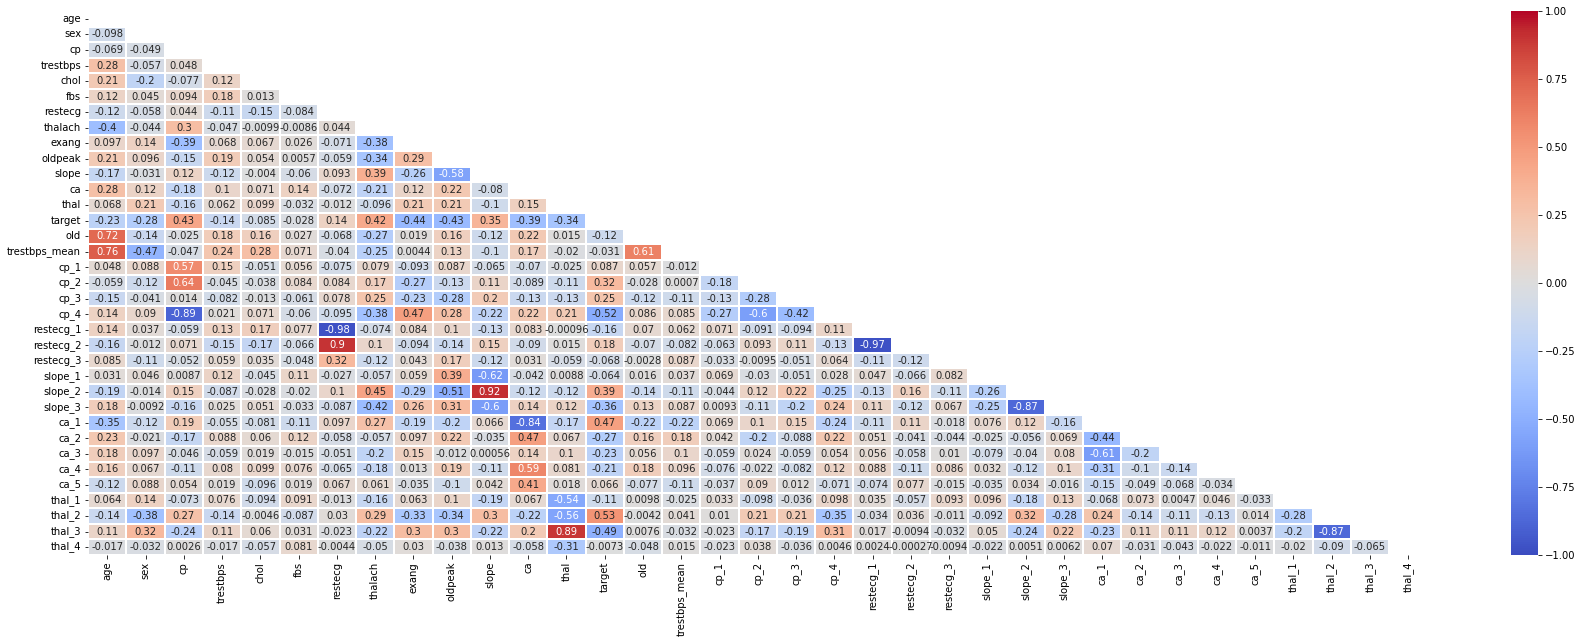

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Возвращаем верхний треугольник матрицы и далее будем его маскировать
upp_mat = np.triu(df_heart.corr())

fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df_heart.corr(), vmin = -1, vmax = +1, annot=True, cmap = 'coolwarm', linewidths=2, mask = upp_mat, ax=ax)

#sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)